In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
# Load the dataset
data = pd.read_csv('crop_yield_data.csv')
data.head()

,date,region,crop_type,soil_type,soil_ph,soil_moisture,temperature,rainfall,sunlight_hours,fertilizer_used,pesticides_used,previous_crop,yield
0,2020-01-01,South,Corn,Clay,5.850327,27.777729,32.257306,236.115479,14.915207,94.946944,21.313657,Corn,1.093884
1,2020-01-02,North,Wheat,Loamy,5.310819,13.341939,31.770809,58.044216,5.352800,117.307156,10.762036,Wheat,2.052423
2,2020-01-03,East,Corn,Sandy,6.398614,37.321831,20.504861,261.335906,5.421288,138.926091,22.720951,Corn,8.499578
3,2020-01-04,East,Corn,Sandy,5.565983,30.358131,18.112974,83.955739,8.763577,183.185985,27.690043,Wheat,6.958456
4,2020-01-05,West,Rice,Sandy,5.427618,16.269538,23.226727,98.265400,13.361468,164.183208,22.551680,Corn,6.777886


C:\Users\gsgow\AppData\Local\Temp\ipykernel_24920\1732232816.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


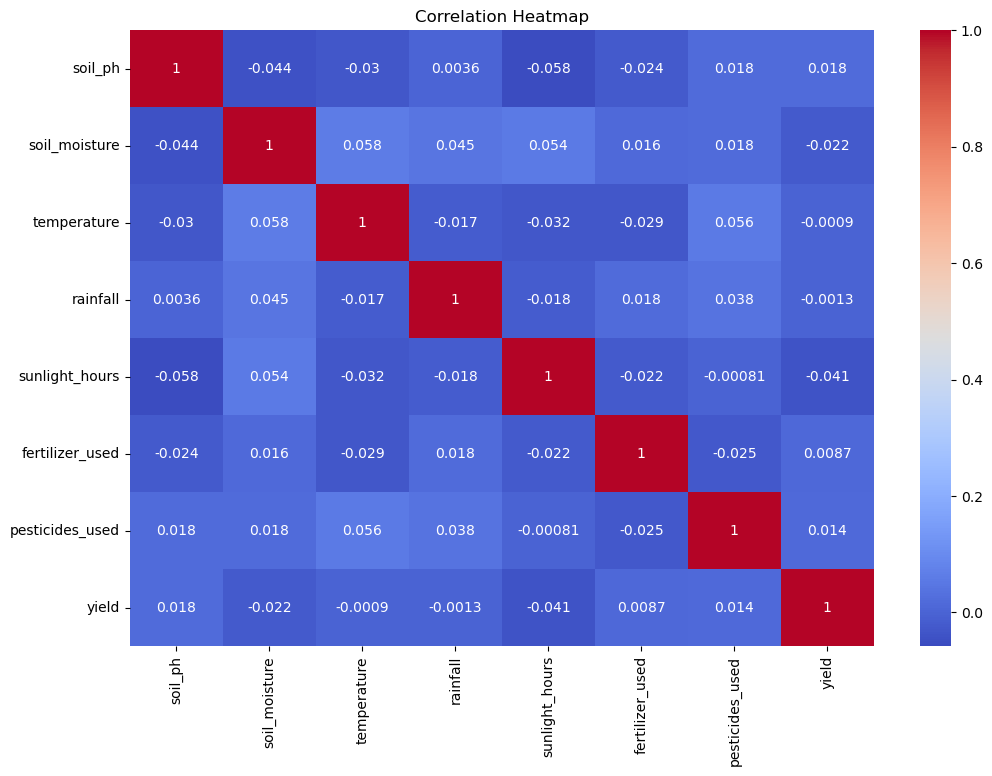

In [3]:
# Visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

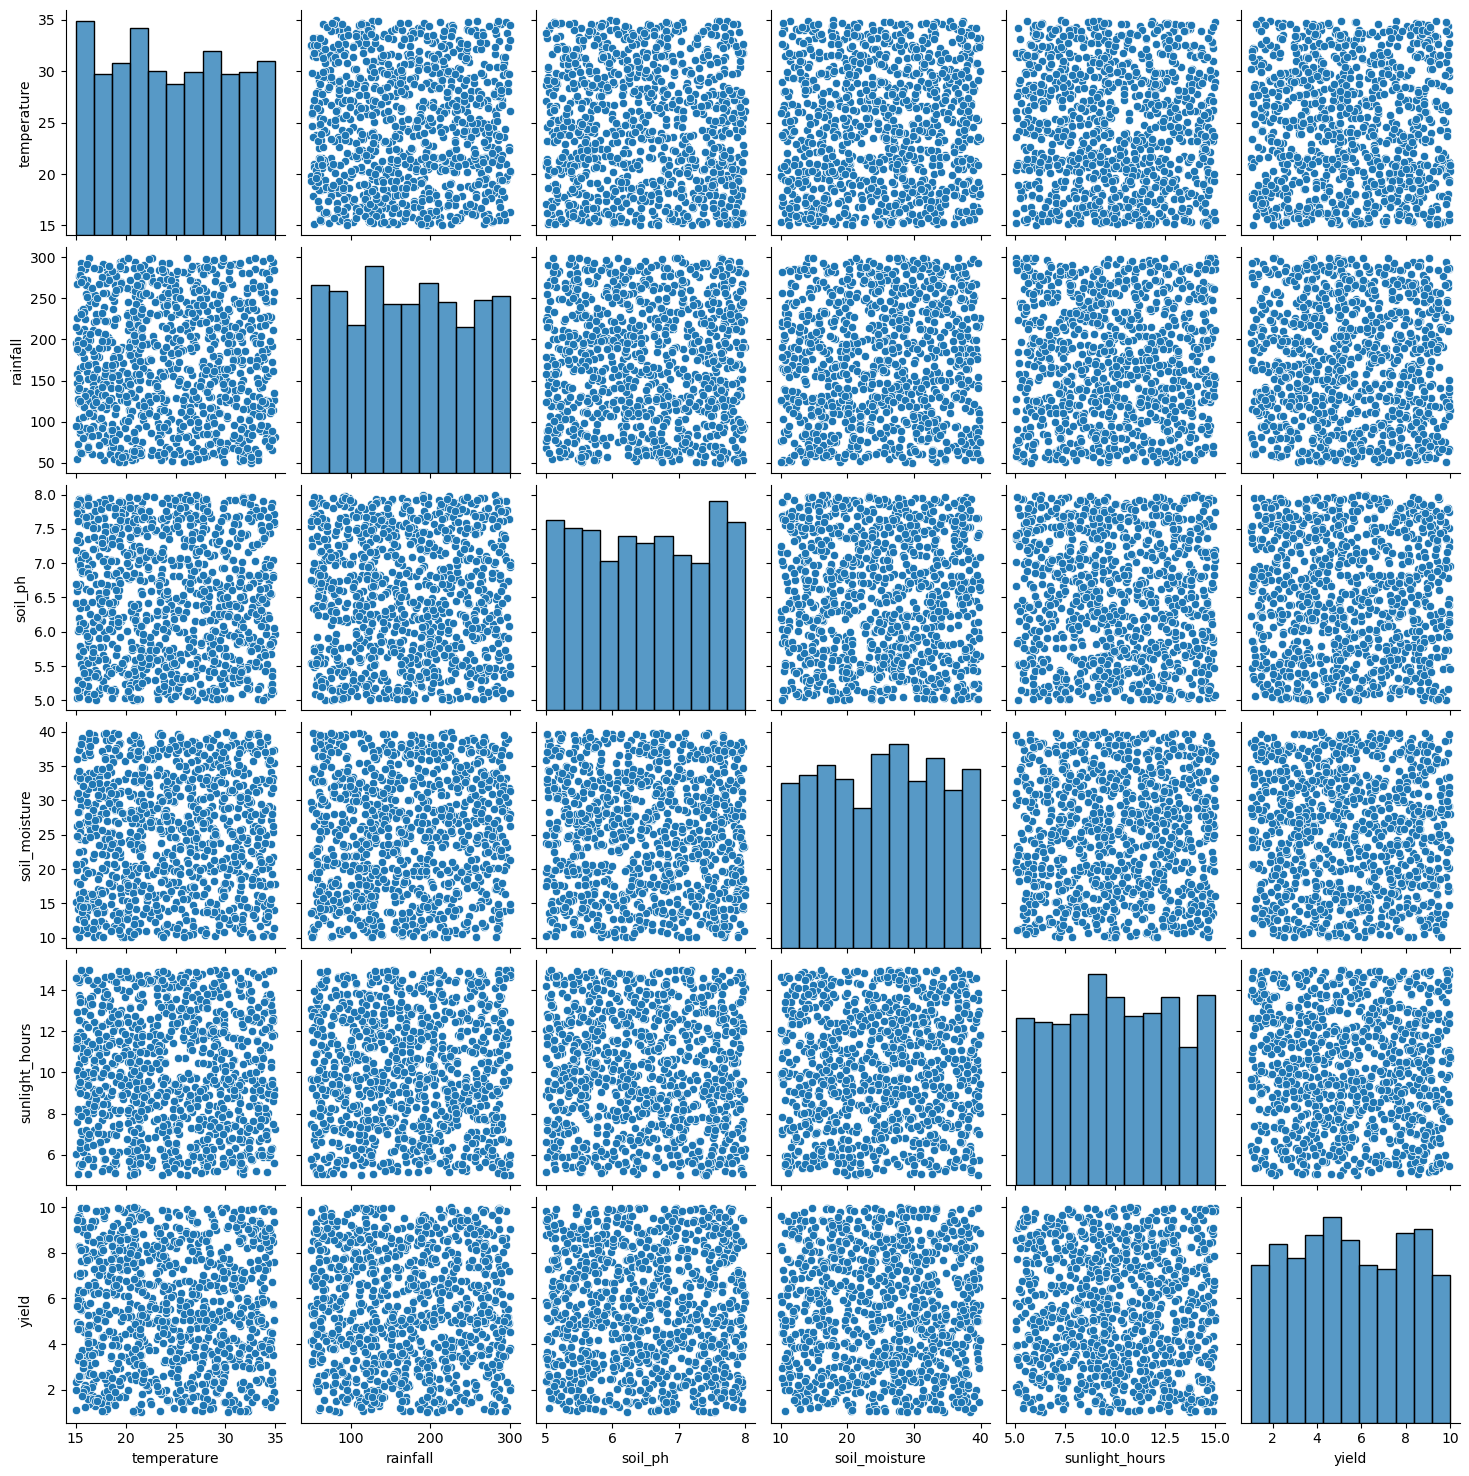

In [4]:
# Pairplot visualization
sns.pairplot(data[['temperature', 'rainfall', 'soil_ph', 'soil_moisture', 'sunlight_hours', 'yield']])
plt.show()

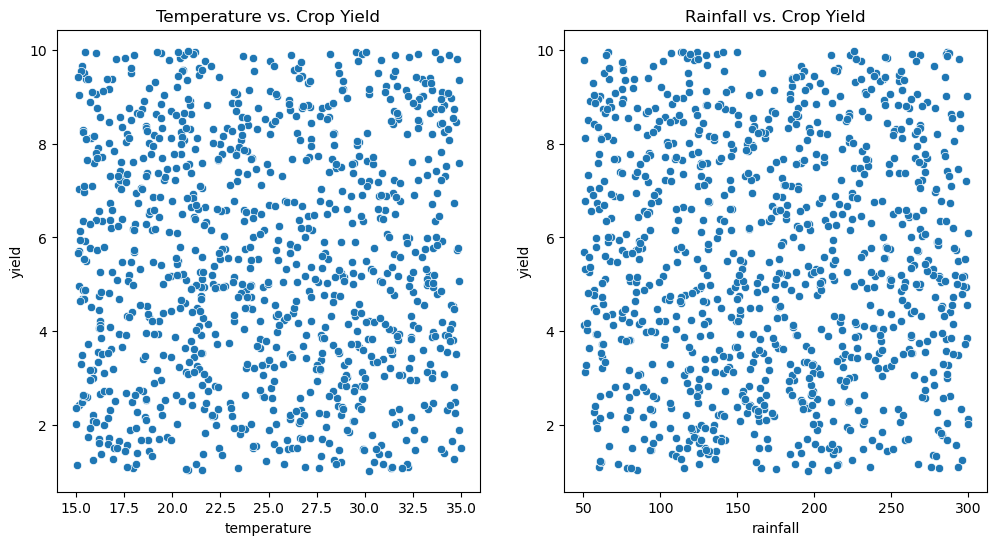

In [5]:
# Scatter plots
plt.figure(figsize=(12, 6))

# Temperature vs. Yield
plt.subplot(1, 2, 1)
sns.scatterplot(x='temperature', y='yield', data=data)
plt.title('Temperature vs. Crop Yield')

# Rainfall vs. Yield
plt.subplot(1, 2, 2)
sns.scatterplot(x='rainfall', y='yield', data=data)
plt.title('Rainfall vs. Crop Yield')

plt.show()

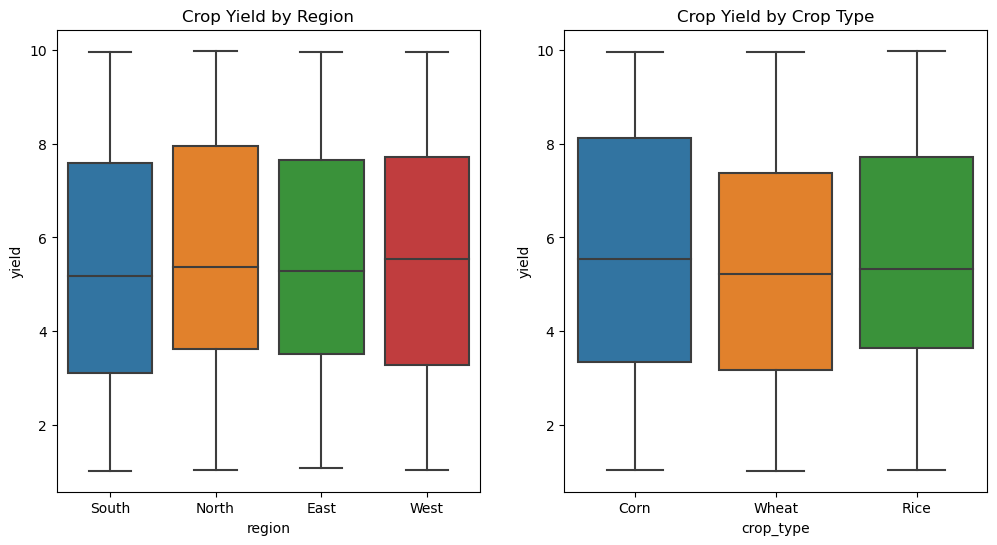

In [6]:
# Boxplots
plt.figure(figsize=(12, 6))

# Yield by Region
plt.subplot(1, 2, 1)
sns.boxplot(x='region', y='yield', data=data)
plt.title('Crop Yield by Region')

# Yield by Crop Type
plt.subplot(1, 2, 2)
sns.boxplot(x='crop_type', y='yield', data=data)
plt.title('Crop Yield by Crop Type')

plt.show()

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])
data['crop_type'] = label_encoder.fit_transform(data['crop_type'])
data['soil_type'] = label_encoder.fit_transform(data['soil_type'])
data['previous_crop'] = label_encoder.fit_transform(data['previous_crop'])

In [8]:
# Define features and target variable
features = data.drop(['date', 'yield'], axis=1)
target = data['yield']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Absolute Error: 2.187139552331488
Mean Squared Error: 6.619739777618443
Root Mean Squared Error: 2.572885496406407
R-squared: -0.04022960267602893


In [12]:
# Save the trained model to a pickle file
with open('crop_yield_model.pkl', 'wb') as file:
    pickle.dump(model, file)